In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading data

In [10]:
data= pd.read_csv('dataset.csv')
data.head()

,0,1,2,3,4,5,6,7,8,target
0,7.547600,0.151261,557.132466,354.008599,0.301029,55.282594,9635.211683,2.0,1.0,9461.469590
1,3.140491,0.794497,837.116189,104.515774,0.110622,88.516243,9425.041942,2.0,5.0,10257.271938
2,2.064447,0.236500,313.757354,259.127993,0.729964,88.350465,9115.661199,1.0,5.0,8719.214483
3,9.099262,0.453953,661.409826,466.070226,0.432750,21.516152,9584.310016,3.0,2.0,9165.197338
4,5.264564,0.683869,344.154511,485.441053,0.085599,90.308205,9193.271575,2.0,1.0,9458.427537


In [11]:
data.shape

(900, 10)

#### checking null values in dataset

In [12]:
data.isnull().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
target    0
dtype: int64

- there are no null values in dataset

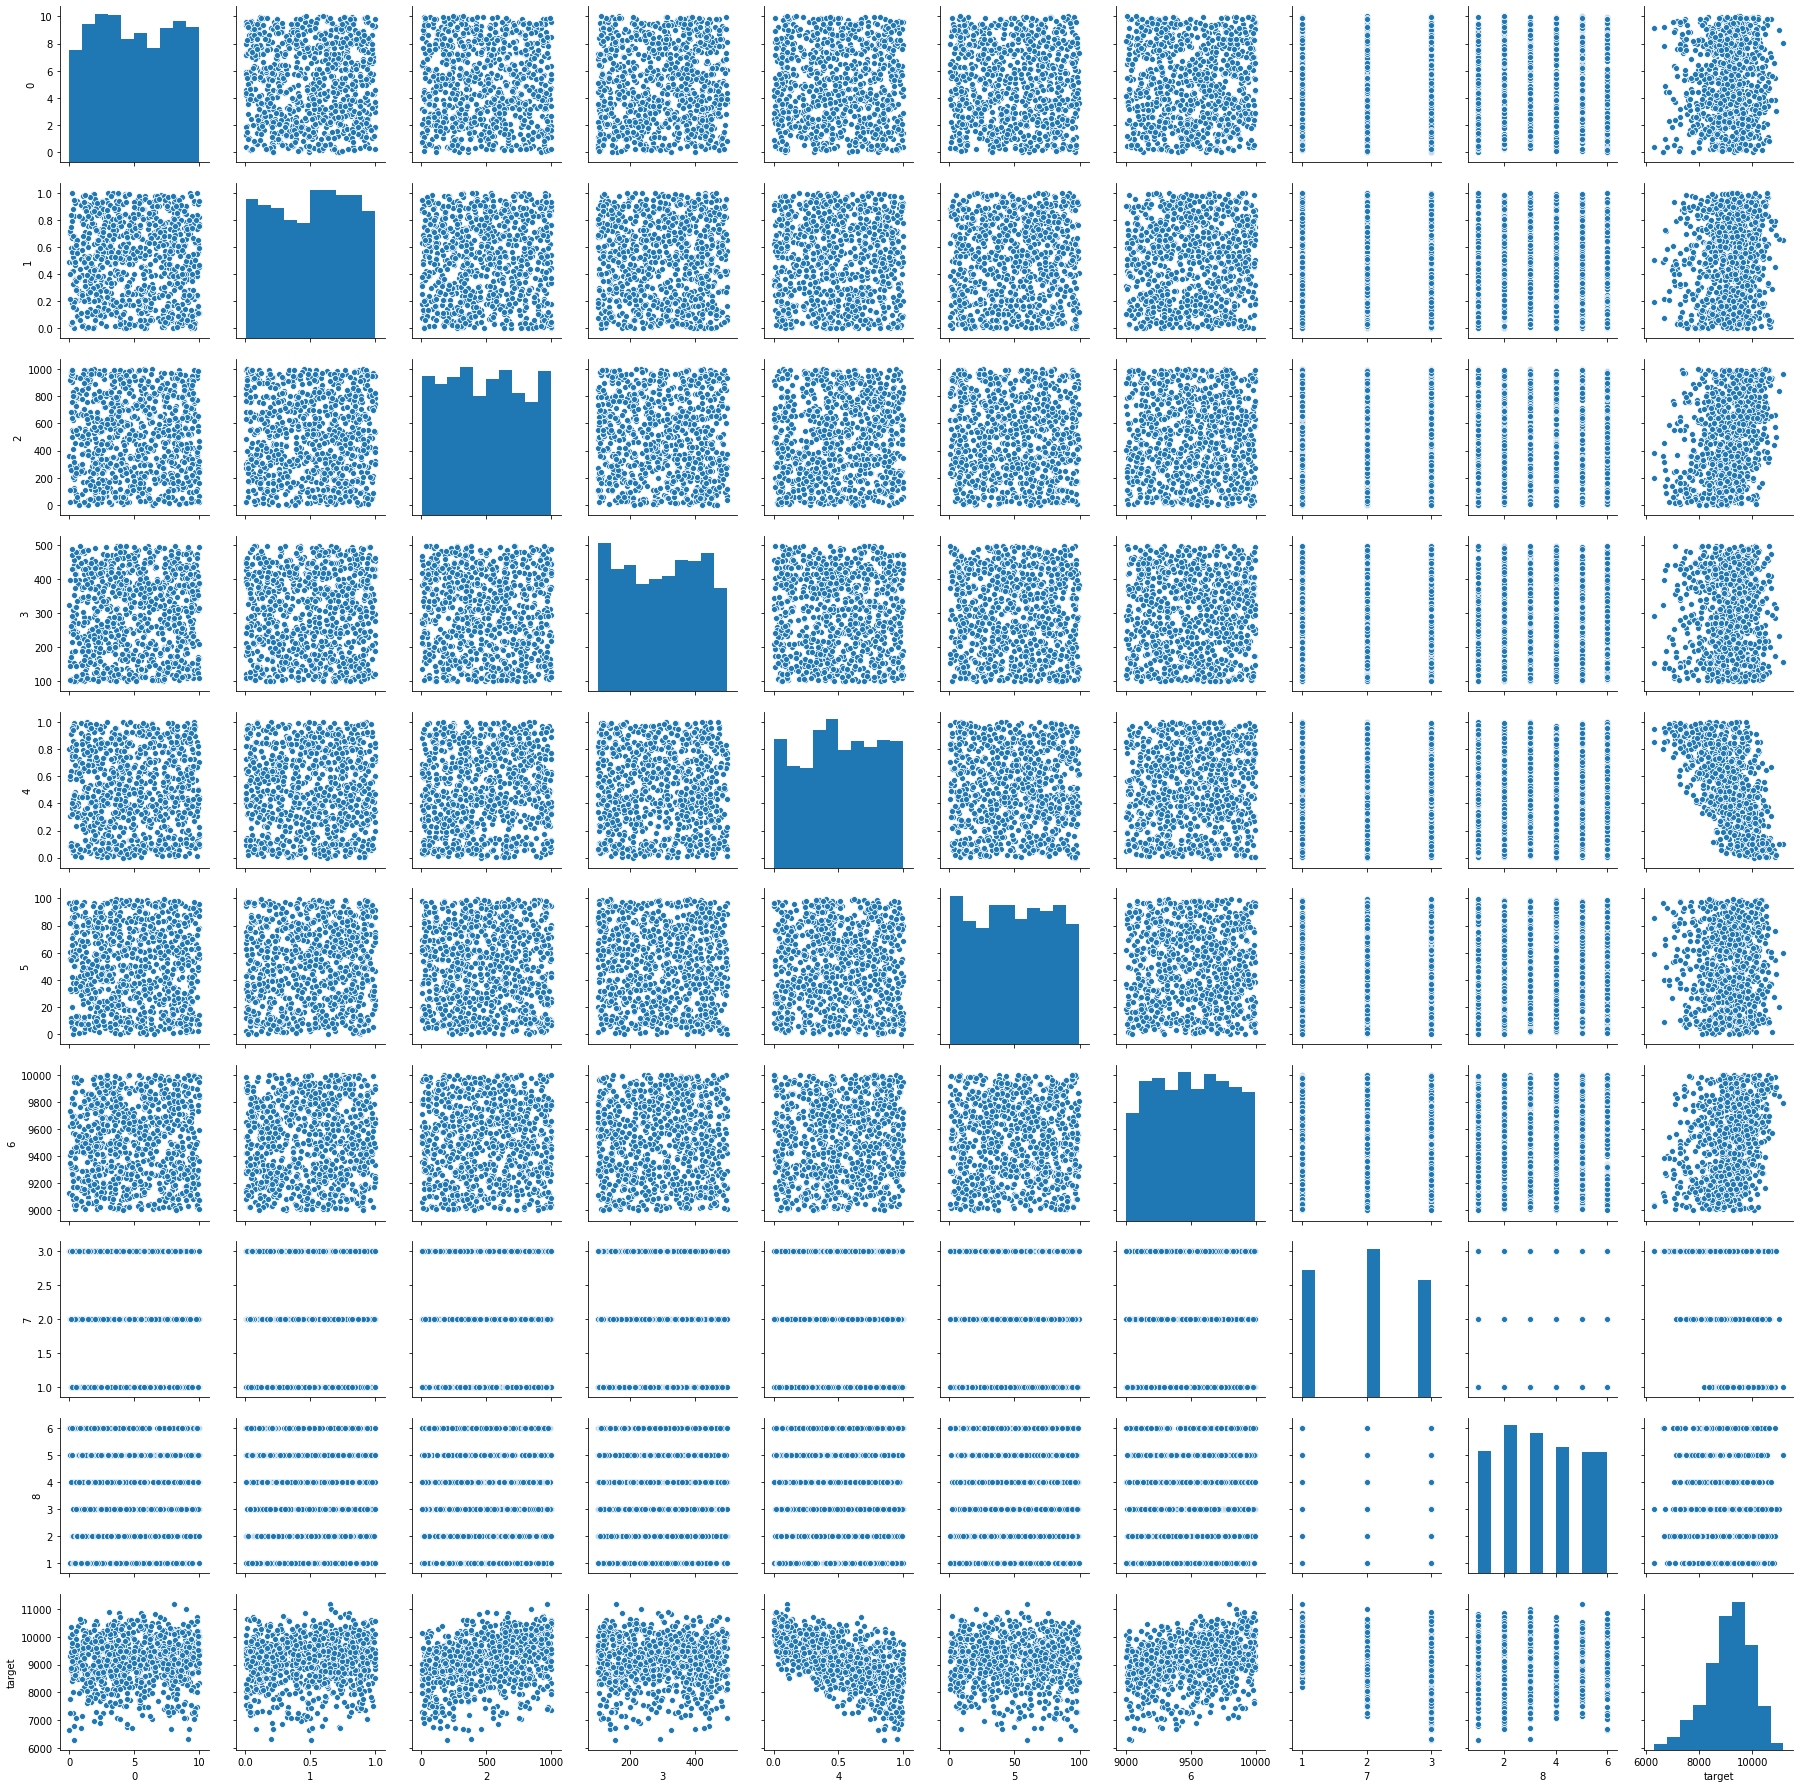

In [13]:
sns.pairplot(data)
plt.show()

- feature 7,8 are categorical
- feature 4 show a negative correlation with target variable 
- there can be outliers in target variable on left side (i.e below lower limit)

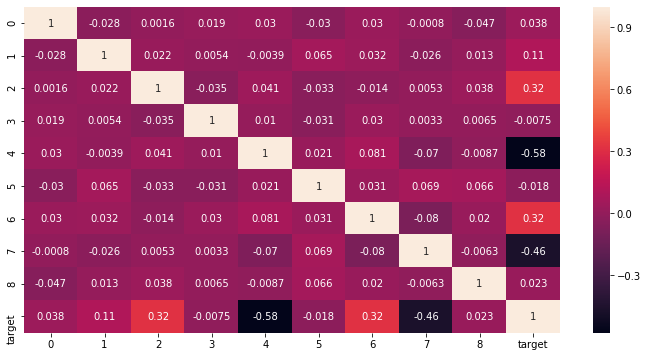

In [11]:
plt.subplots(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

- features 1,2,4,6,7 are highly correlated with target variable
- there is very low dependency amoung independent variable (i.e there is low multicollinearity)
- the features 0,3,5,8 are very less correlated with target. So if the model overfits we can drop this features 

In [20]:
data['7'].value_counts()

2.0    340
1.0    292
3.0    268
Name: 7, dtype: int64

In [21]:
data['8'].value_counts()

2.0    171
3.0    162
4.0    146
1.0    141
6.0    140
5.0    140
Name: 8, dtype: int64

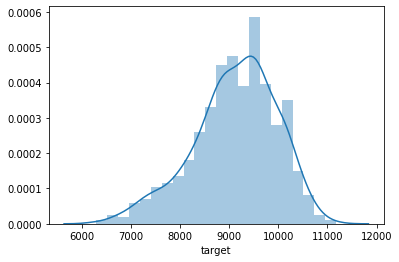

In [15]:
sns.distplot(data['target'])
plt.show()

0             AxesSubplot(0.125,0.71587;0.227941x0.16413)
1          AxesSubplot(0.398529,0.71587;0.227941x0.16413)
2          AxesSubplot(0.672059,0.71587;0.227941x0.16413)
3            AxesSubplot(0.125,0.518913;0.227941x0.16413)
4         AxesSubplot(0.398529,0.518913;0.227941x0.16413)
5         AxesSubplot(0.672059,0.518913;0.227941x0.16413)
6            AxesSubplot(0.125,0.321957;0.227941x0.16413)
7         AxesSubplot(0.398529,0.321957;0.227941x0.16413)
8         AxesSubplot(0.672059,0.321957;0.227941x0.16413)
target          AxesSubplot(0.125,0.125;0.227941x0.16413)
dtype: object

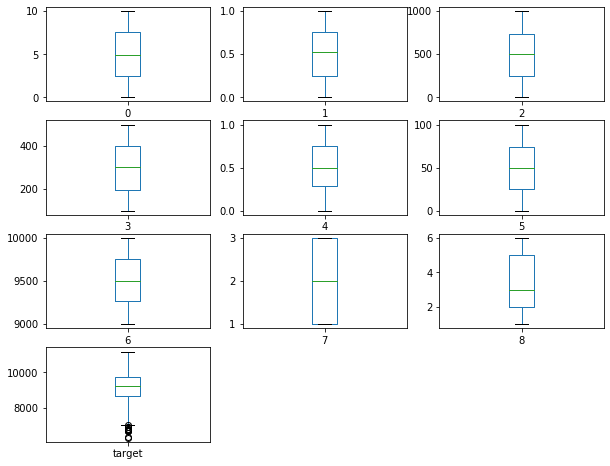

In [39]:
data.plot(kind= 'box' , subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(10,8))

- there are outliers in target variable at lower limit 

### Checking outliers

In [17]:
q1 = data['target'].quantile(q=0.25)
q3 = data['target'].quantile(q=0.75)
IQR = q3-q1
UL = q3 + 1.5*IQR
LL = q1 - 1.5*IQR
outliers = data[data['target']<LL]
print(outliers.shape)
print("ouliers are :")
outliers


(12, 10)
ouliers are :


,0,1,2,3,4,5,6,7,8,target
44,0.037452,0.490266,357.049918,324.653060,0.801370,96.826712,9132.240812,3.0,6.0,6659.684759
51,9.198829,0.215462,458.532972,138.462926,0.957850,40.143874,9109.521271,3.0,6.0,6673.339243
98,4.422451,0.717234,90.819989,189.071954,0.850717,49.591575,9261.424864,3.0,2.0,6763.998801
116,0.386654,0.505189,199.553894,152.741922,0.852861,59.458378,9038.096811,3.0,1.0,6298.862662
170,9.142931,0.198279,383.719865,292.680364,0.952382,85.295483,9029.673794,3.0,3.0,6316.879822
191,0.370323,0.586760,193.496471,442.155433,0.859204,93.222103,9402.948868,3.0,1.0,6803.240938
285,0.955439,0.514303,255.468207,152.878852,0.916195,65.397322,9068.368826,3.0,3.0,6737.601784
351,4.475729,0.278519,589.244310,140.133658,0.983219,36.234700,9384.681324,3.0,1.0,6879.449941
488,2.341553,0.207691,23.044677,231.905673,0.951001,39.895962,9539.232396,3.0,2.0,6888.312938
597,4.866582,0.726300,141.822440,428.618977,0.925345,70.200660,9278.435877,3.0,3.0,6712.041242


- there are 12 outlier in dataset 
- the outliers are almost only 1.2 percentage of whole data
- so its better if we drop the outliers 
- insted of treating outliers using various transformation techniques like log,sqrt etc.

#### removing outliers

In [18]:
data=data[data['target']>LL]
data.shape

(888, 10)

In [19]:
X = data.drop(['target'],axis=1)
y = data['target']

#### splitting data for train and test

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

### fitting base model

##### LinearRegression 

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
lr.score(X_train,y_train)

0.825110012221486

In [25]:
lr.score(X_test,y_test)

0.7940664978130797

- By referring above train and test score we can say model is doing good
- Altho model is slightly overfitting

##### RandomForest

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [28]:
rfr.score(X_train,y_train)

0.9760146590761489

In [29]:
rfr.score(X_test,y_test)

0.8462649421033346

- By referring above train and test score we can say that model is overfitting.
- overfitting can be reduce using feature selection.
- As  we already know from heatmap that there are some less important feactures which are not much contributing for making  predictions

#### Feature Selection

In [99]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
max_score = 0
n = 0
score_list = []
for i in range(1,len(X_train.columns)):
    model = RandomForestRegressor()
    rfe = RFE(model, i)
    X1_train, X1_test, y1_train, y1_test = train_test_split(X_train,y_train, test_size = 0.3, random_state = 0)
    X_train_rfe = rfe.fit_transform(X1_train,y1_train)
    X_test_rfe = rfe.transform(X1_test)
    model.fit(X_train_rfe,y1_train)
    y_pred = model.predict(X_test_rfe)
    score = model.score(X_test_rfe,y1_test)
    score_list.append(score)
    if(score>max_score):
        max_score = score
        n = i
print('Optimum no of features: ',n)
print('Score with %d features:  %f '% (n,max_score))

Optimum no of features:  4
Score with 4 features:  0.847338 


- Now let's build the model using optimum number of features.

#### building model using top 4 correlated features 

- from heatmap we know  top 4 correlated feactures are:- feature no [2,4,6,7]
                                                         

In [33]:
X1=data.drop(['1','0','3','5','8','target'],axis=1)
y1=data['target']

In [35]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3,random_state=100)

##### RandomForest

In [36]:
rfr = RandomForestRegressor()
rfr.fit(X1_train,y1_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [37]:
rfr.score(X1_train,y1_train)

0.9780682288376893

In [38]:
rfr.score(X1_test,y1_test)

0.8392943417528036

- By referring above train and test score we can say model is doing good 


In [41]:
 from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

In [42]:
gbr = GradientBoostingRegressor()
gbr.fit(X1_train,y1_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [44]:
gbr.score(X1_train,y1_train)

0.9320359696833069

In [43]:
gbr.score(X1_test,y1_test)

0.8486466852740933

In [45]:
import xgboost as xgb

In [46]:
xg= xgb.XGBRegressor()
xg.fit(X1_train,y1_train)

C:\Users\Asus\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:44:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [47]:
xg.score(X1_train,y1_train)

0.9296589336909569

In [49]:
xg.score(X1_test,y1_test)

0.8422016755237617

#### Hyper parameter tuning

In [82]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [100, 250,300,400], 'max_features': [4,3,2], 
 'max_depth': [50, 100,75], 'loss':['ls','lad','huber','quantile'],'learning_rate':[0.1,0.01,0.05],
  'criterion':['mse','mae','friedman_mse'],'max_depth':[2,3,4]
}
]

In [83]:
gbr = GradientBoostingRegressor()
random = RandomizedSearchCV(gbr,param_grid,cv=5,scoring='r2',n_iter=30,n_jobs=-1)

In [84]:
random.fit(X1_train,y1_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [85]:
random.best_params_

{'n_estimators': 250,
 'max_features': 3,
 'max_depth': 3,
 'loss': 'huber',
 'learning_rate': 0.05,
 'criterion': 'friedman_mse'}

#### final model

In [113]:
gbr = GradientBoostingRegressor(n_estimators=200,max_features=3,max_depth=2,learning_rate=0.05,loss='huber')
gbr.fit(X1_train,y1_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='huber',
                          max_depth=2, max_features=3, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [114]:
gbr.score(X1_train,y1_train)

0.9058923251929596

In [115]:
gbr.score(X1_test,y1_test)

0.8436125665159073

- By hyperparameter tuning there is a slight drop in overfitting of model

#### testing dataset

In [137]:
test= pd.read_csv('prediction.csv')
test.head()

,0,1,2,3,4,5,6,7,8
0,8.243945,0.442707,814.191463,437.449497,0.820757,66.358208,9321.584760,1.0,5.0
1,0.450469,0.734878,690.536337,337.971868,0.163483,88.966042,9653.465215,2.0,3.0
2,5.805761,0.412531,225.544432,468.295427,0.254678,27.853712,9840.535247,2.0,3.0
3,4.126340,0.685302,73.330815,169.578437,0.828849,81.691968,9044.806270,2.0,5.0
4,8.082666,0.449977,526.274384,308.148895,0.737136,30.420377,9916.538668,1.0,5.0


In [138]:
test.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [139]:
test=test.drop(['1','0','3','5','8'],axis=1)
test.head()

,2,4,6,7
0,814.191463,0.820757,9321.584760,1.0
1,690.536337,0.163483,9653.465215,2.0
2,225.544432,0.254678,9840.535247,2.0
3,73.330815,0.828849,9044.806270,2.0
4,526.274384,0.737136,9916.538668,1.0


In [140]:
y_pred= gbr.predict(test)

In [141]:
test1= pd.read_csv('prediction.csv')

In [142]:
test1['target'] = y_pred
test1.head()

,0,1,2,3,4,5,6,7,8,target
0,8.243945,0.442707,814.191463,437.449497,0.820757,66.358208,9321.584760,1.0,5.0,9284.381632
1,0.450469,0.734878,690.536337,337.971868,0.163483,88.966042,9653.465215,2.0,3.0,10048.562656
2,5.805761,0.412531,225.544432,468.295427,0.254678,27.853712,9840.535247,2.0,3.0,9584.510103
3,4.126340,0.685302,73.330815,169.578437,0.828849,81.691968,9044.806270,2.0,5.0,7655.153967
4,8.082666,0.449977,526.274384,308.148895,0.737136,30.420377,9916.538668,1.0,5.0,9820.109161


In [143]:
test.to_csv('predictionregression_with target.csv',float_format='%.16g')